# Check Augmentations
This notebook shows the used augmentations and how the images are changed when they are applied. When using augmentations,
it is always important to check that the images are still making sense and that the core features could still be recognized 
by the model.

In [3]:
import sys
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

%matplotlib inline

plt.rcParams['figure.figsize'] = [8,8]
#sns.set_style("whitegrid")

Let's first read in an example image that can be used for checking all augmentations.

In [4]:
df = pd.read_csv(r"data\Bird_Species_cleaned.csv")
df.head()

filepaths                 labels data set
0  train\AFRICAN CROWNED CRANE\001.jpg  AFRICAN CROWNED CRANE    train
1  train\AFRICAN CROWNED CRANE\002.jpg  AFRICAN CROWNED CRANE    train
2  train\AFRICAN CROWNED CRANE\003.jpg  AFRICAN CROWNED CRANE    train
3  train\AFRICAN CROWNED CRANE\004.jpg  AFRICAN CROWNED CRANE    train
4  train\AFRICAN CROWNED CRANE\005.jpg  AFRICAN CROWNED CRANE    train

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create datagenerators by calling flow_from_dataframe on them
path_to_images = r"data"
batch_size = 8
shuffle = False
target_size = (224, 224)

datagen = ImageDataGenerator()
generator = datagen.flow_from_dataframe(dataframe=df, directory=path_to_images,
                                        x_col="filepaths", y_col="labels", 
                                        batch_size=batch_size, shuffle=shuffle,
                                        class_mode="raw", target_size=target_size, 
                                        color_mode="rgb", seed=42)

Found 46622 validated image filenames.


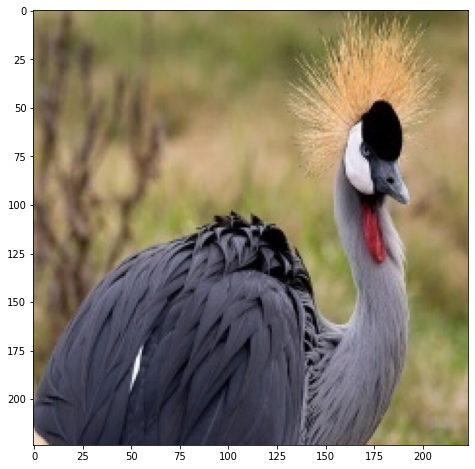

In [8]:
image = generator[0][0][2]
plt.imshow(image.astype(np.uint8))

## Add 

In [57]:
def add_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Add((60, 60))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

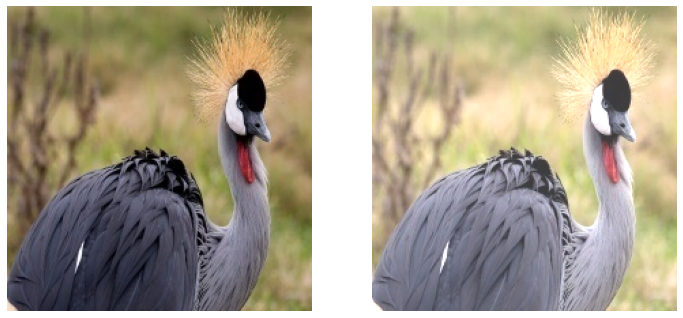

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_add = add_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_add.astype(np.uint8))
ax2.axis("off")
plt.show()

In [59]:
def add_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Add((-60, -60))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

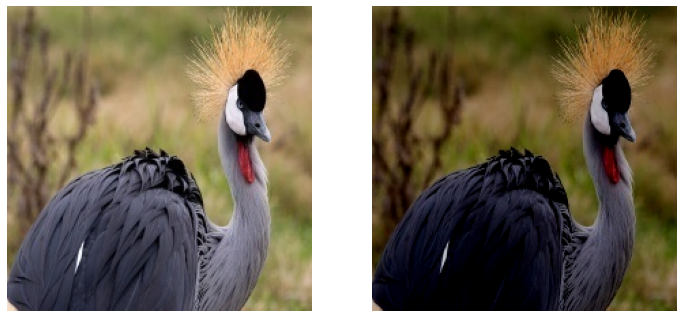

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_add_low = add_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_add_low.astype(np.uint8))
ax2.axis("off")
plt.show()

## Gaussian Noise

In [96]:
def gaussian_noise_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.AdditiveGaussianNoise(scale=(0, 0.2*255))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

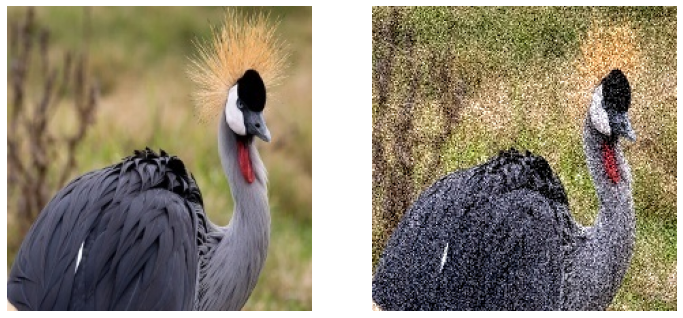

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_gaussian_noise = gaussian_noise_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_gaussian_noise.astype(np.uint8))
ax2.axis("off")
plt.show()

## Multiply

In [63]:
def multiply_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Multiply((1.6, 1.6))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

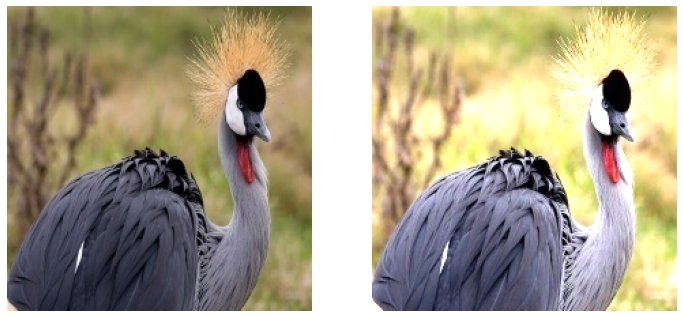

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_mult = multiply_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_mult.astype(np.uint8))
ax2.axis("off")
plt.show()

In [65]:
def multiply_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Multiply((0.5, 0.5))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

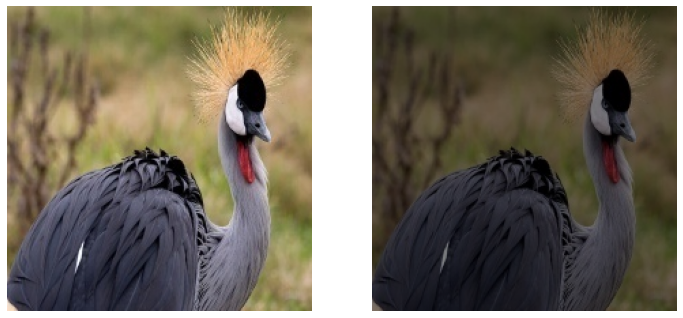

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_mult_low = multiply_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_mult_low.astype(np.uint8))
ax2.axis("off")
plt.show()

## Salt and Pepper

In [25]:
def salt_and_pepper_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.SaltAndPepper(0.1)
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

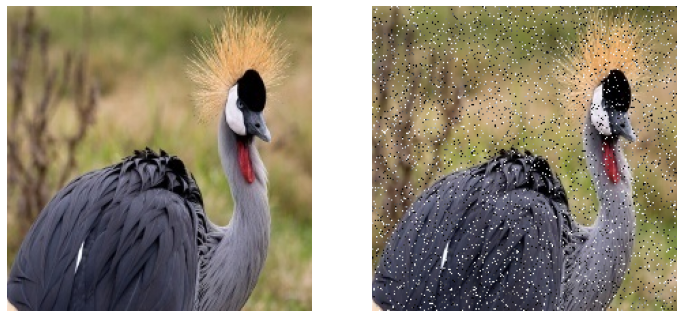

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_salt = salt_and_pepper_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_salt.astype(np.uint8))
ax2.axis("off")
plt.show()

## Gaussian Blur

In [27]:
def gaussian_blur_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.GaussianBlur(sigma=(2.0, 2.0))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

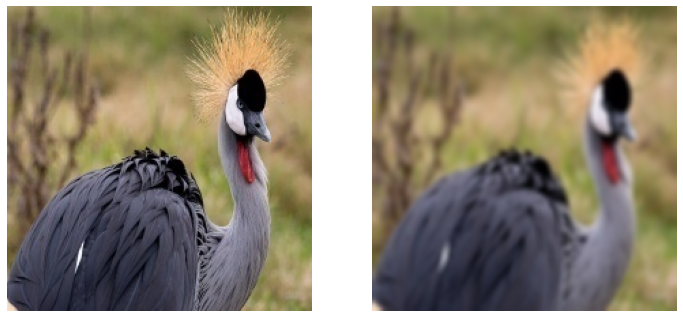

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug = gaussian_blur_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug.astype(np.uint8))
ax2.axis("off")
plt.show()

## Motion Blur

In [68]:
def motion_blur_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.MotionBlur(k=10)
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

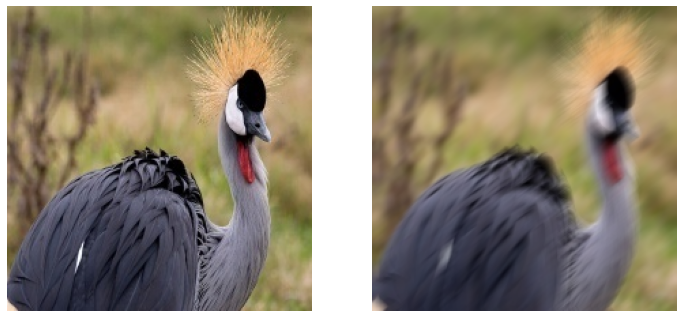

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_motion = motion_blur_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_motion.astype(np.uint8))
ax2.axis("off")
plt.show()

## Gamma Contrast

In [70]:
def gamma_contrast_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.GammaContrast((1.2, 1.2))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

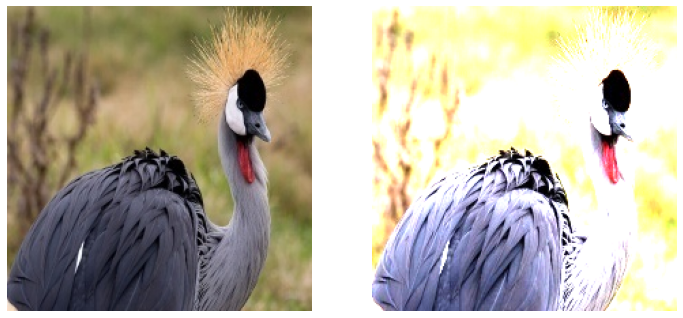

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_gamma = gamma_contrast_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_gamma.astype(np.uint8))
ax2.axis("off")
plt.show()

In [72]:
def gamma_contrast_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.GammaContrast((0.8, 0.8))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

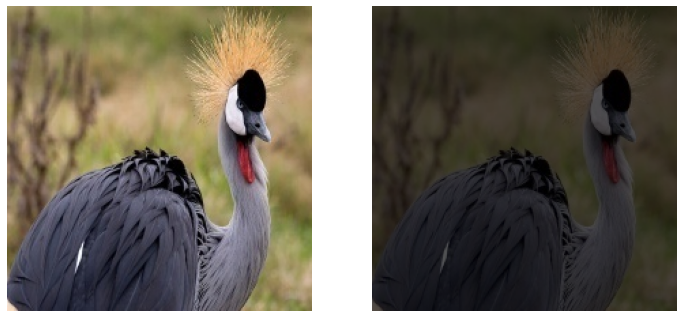

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_gamma_low = gamma_contrast_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_gamma_low.astype(np.uint8))
ax2.axis("off")
plt.show()

## Scaling

In [74]:
def scaling_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Affine(scale=(1.2, 1.2))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

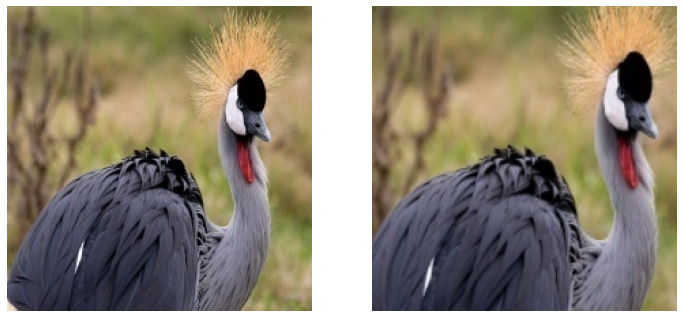

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_scaling = scaling_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_scaling.astype(np.uint8))
ax2.axis("off")
plt.show()

In [76]:
def scaling_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Affine(scale=(0.5, 0.5))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

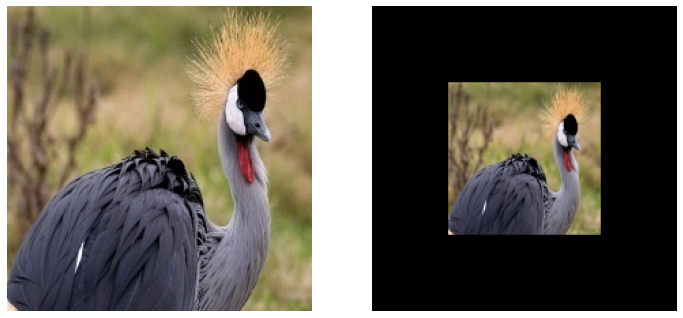

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_scale_out = scaling_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_scale_out.astype(np.uint8))
ax2.axis("off")
plt.show()

## Rotate

In [78]:
def rotate_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Rotate((45, 45))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

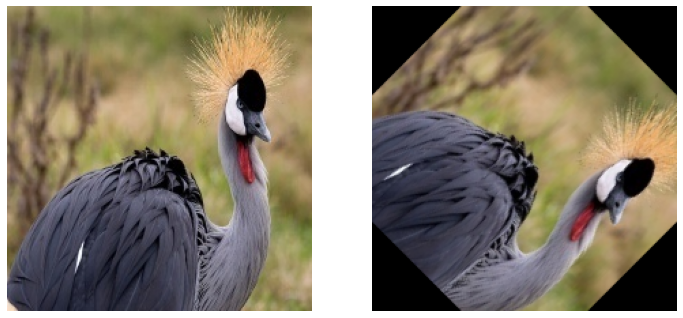

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_rotate = rotate_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_rotate.astype(np.uint8))
ax2.axis("off")
plt.show()

In [45]:
def rotate_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.Rotate((-45, -45))
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

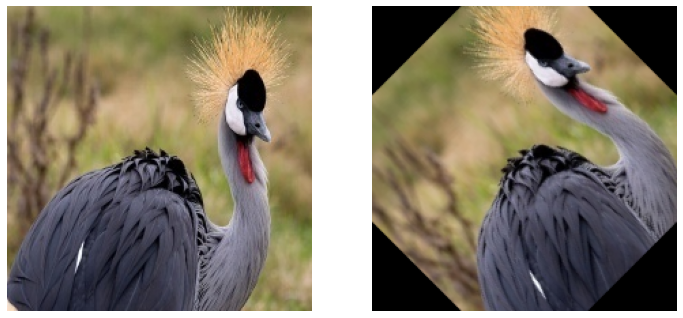

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug = rotate_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug.astype(np.uint8))
ax2.axis("off")
plt.show()

## Elastic Transformation

In [80]:
def elastic_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug = iaa.ElasticTransformation(alpha=(300.0, 300.0), sigma=25.0)
    
    # apply augmentation
    input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

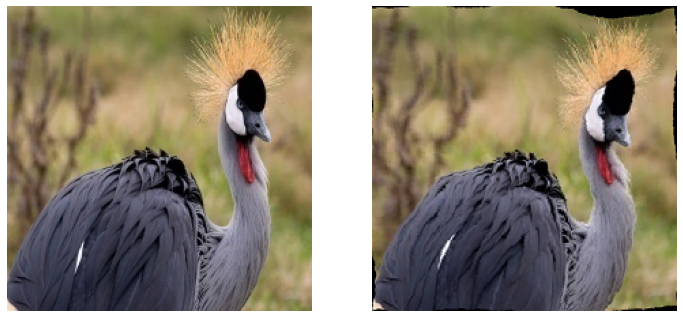

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

image_aug_elastic = elastic_augmentation(image)
ax1.imshow(image.astype(np.uint8))
ax1.axis("off")
ax2.imshow(image_aug_elastic.astype(np.uint8))
ax2.axis("off")
plt.show()

## Plot all Single Augmentations

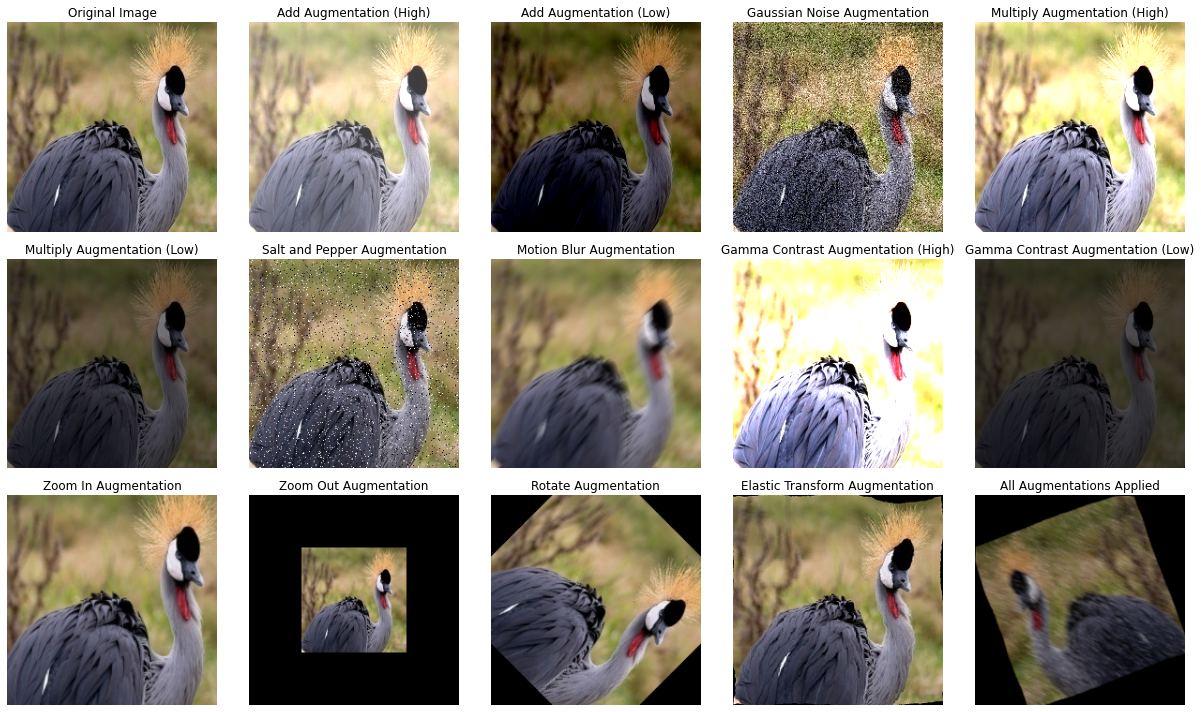

In [123]:
fig, ax = plt.subplots(3, 5, figsize=(17, 10))
ax[0][0].imshow(image.astype(np.uint8))
ax[0][0].axis("off")
ax[0][0].set_title("Original Image")

ax[0][1].imshow(image_aug_add.astype(np.uint8))
ax[0][1].axis("off")
ax[0][1].set_title("Add Augmentation (High)")

ax[0][2].imshow(image_aug_add_low.astype(np.uint8))
ax[0][2].axis("off")
ax[0][2].set_title("Add Augmentation (Low)")

ax[0][3].imshow(image_aug_gaussian_noise.astype(np.uint8))
ax[0][3].axis("off")
ax[0][3].set_title("Gaussian Noise Augmentation")

ax[0][4].imshow(image_aug_mult.astype(np.uint8))
ax[0][4].axis("off")
ax[0][4].set_title("Multiply Augmentation (High)")

ax[1][0].imshow(image_aug_mult_low.astype(np.uint8))
ax[1][0].axis("off")
ax[1][0].set_title("Multiply Augmentation (Low)")

ax[1][1].imshow(image_aug_salt.astype(np.uint8))
ax[1][1].axis("off")
ax[1][1].set_title("Salt and Pepper Augmentation")

ax[1][2].imshow(image_aug_motion.astype(np.uint8))
ax[1][2].axis("off")
ax[1][2].set_title("Motion Blur Augmentation")

ax[1][3].imshow(image_aug_gamma.astype(np.uint8))
ax[1][3].axis("off")
ax[1][3].set_title("Gamma Contrast Augmentation (High)")

ax[1][4].imshow(image_aug_gamma_low.astype(np.uint8))
ax[1][4].axis("off")
ax[1][4].set_title("Gamma Contrast Augmentation (Low)")

ax[2][0].imshow(image_aug_scaling.astype(np.uint8))
ax[2][0].axis("off")
ax[2][0].set_title("Zoom In Augmentation")

ax[2][1].imshow(image_aug_scale_out.astype(np.uint8))
ax[2][1].axis("off")
ax[2][1].set_title("Zoom Out Augmentation")

ax[2][2].imshow(image_aug_rotate.astype(np.uint8))
ax[2][2].axis("off")
ax[2][2].set_title("Rotate Augmentation")

ax[2][3].imshow(image_aug_elastic.astype(np.uint8))
ax[2][3].axis("off")
ax[2][3].set_title("Elastic Transform Augmentation")

ax[2][4].imshow(image_aug_all.astype(np.uint8))
ax[2][4].axis("off")
ax[2][4].set_title("All Augmentations Applied")

plt.tight_layout()
plt.savefig(r"figures\overview_augmentations.jpg")
plt.savefig(r"figures\overview_augmentations.pdf")
plt.show()

## Check all Augmentations

In [105]:
def apply_augmentation(input_image):
    input_image = np.expand_dims(input_image, axis=0)
    aug_list = [
                iaa.Fliplr(1.0),
                iaa.Multiply((0.5, 1.5)),
                iaa.SaltAndPepper(0.1),
                [iaa.GammaContrast((0.8, 1.2)),iaa.Add((-60, 60))],
                iaa.AdditiveGaussianNoise(scale=(0, 0.2*255)),
                iaa.MotionBlur(k=10),
                iaa.Affine(scale=(0.5, 1.2)),
                iaa.Rotate((-45, 45)),
                iaa.ElasticTransformation(alpha=(50.0, 300.0), sigma=25.0),
              ]                
    for idx, aug in enumerate(aug_list):
        if isinstance(aug, list):
            rand_aug = np.random.randint(0, 2)
            input_image = np.clip(aug[rand_aug](images=input_image), 0., 255.)
        else:
            input_image = np.clip(aug(images=input_image), 0., 255.)

    return np.squeeze(input_image, axis=0)

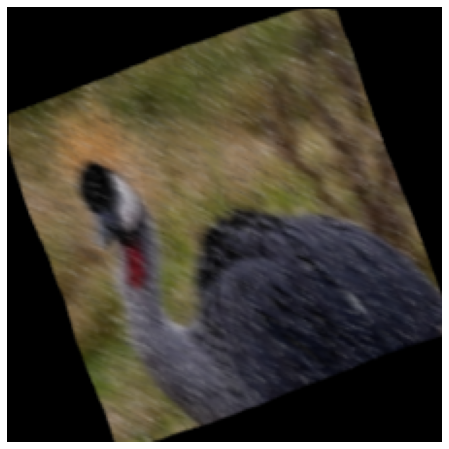

In [116]:
image_aug_all = apply_augmentation(image)
plt.imshow(image_aug_all.astype(np.uint8))
plt.axis("off")
plt.show()

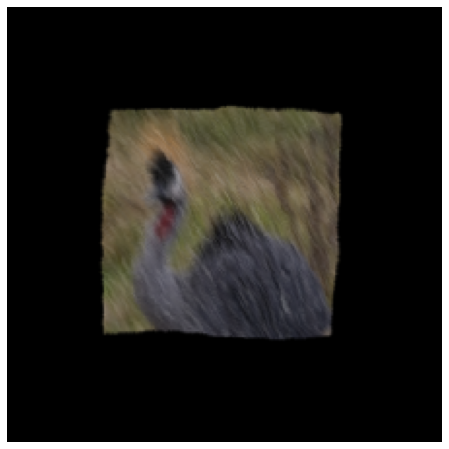

In [51]:
image_aug = apply_augmentation(image)
plt.imshow(image_aug.astype(np.uint8))
plt.axis("off")
plt.show()

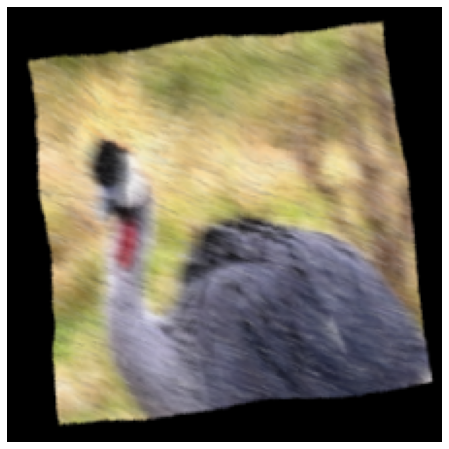

In [52]:
image_aug = apply_augmentation(image)
plt.imshow(image_aug.astype(np.uint8))
plt.axis("off")
plt.show()

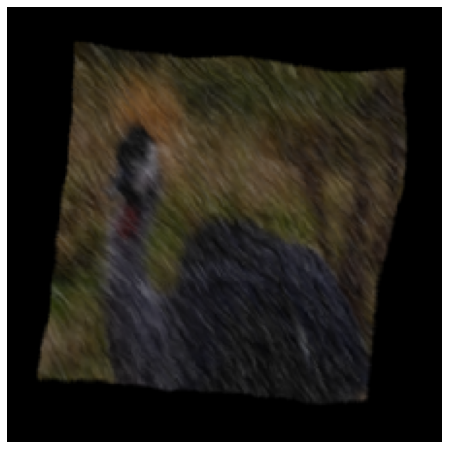

In [53]:
image_aug = apply_augmentation(image)
plt.imshow(image_aug.astype(np.uint8))
plt.axis("off")
plt.show()

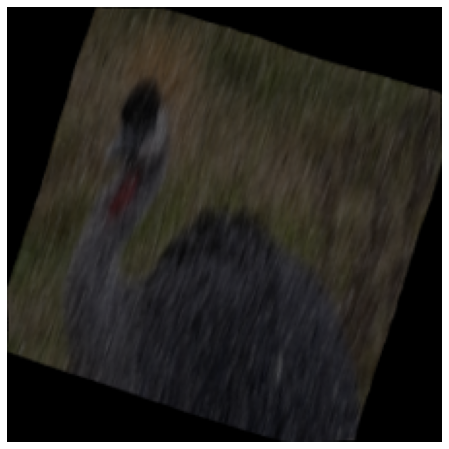

In [54]:
image_aug = apply_augmentation(image)
plt.imshow(image_aug.astype(np.uint8))
plt.axis("off")
plt.show()

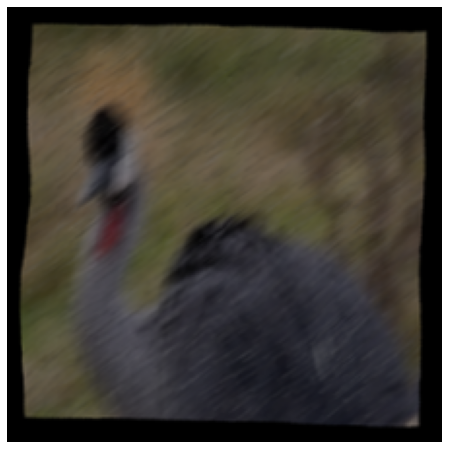

In [55]:
image_aug = apply_augmentation(image)
plt.imshow(image_aug.astype(np.uint8))
plt.axis("off")
plt.show()